In [2]:
import numpy as np
import yt
import magnetic_field
from params import Params
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [3]:
# Nr,Nz = 128,256
Nr,Nz = 32,256
dirname = f"diags{Nr}x{Nz}-1ict"
params = Params()
params.load(f"{dirname}/params.json")

yt : [INFO     ] 2023-11-20 14:20:46,500 Parameters: current_time              = 3.802688834070571e-10
yt : [INFO     ] 2023-11-20 14:20:46,501 Parameters: domain_dimensions         = [ 32 256   1]
yt : [INFO     ] 2023-11-20 14:20:46,502 Parameters: domain_left_edge          = [ 0.   -0.05  0.  ]
yt : [INFO     ] 2023-11-20 14:20:46,502 Parameters: domain_right_edge         = [0.01 0.05 1.  ]


yt : [INFO     ] 2023-11-20 14:20:46,648 xlim = 0.000000 0.010000
yt : [INFO     ] 2023-11-20 14:20:46,649 ylim = -0.050000 0.050000
yt : [INFO     ] 2023-11-20 14:20:46,651 xlim = 0.000000 0.010000
yt : [INFO     ] 2023-11-20 14:20:46,652 ylim = -0.050000 0.050000
yt : [INFO     ] 2023-11-20 14:20:46,654 Making a fixed resolution buffer of (('boxlib', 'phi')) 800 by 800
yt : [INFO     ] 2023-11-20 14:20:46,927 Making a fixed resolution buffer of (('boxlib', 'rho_electrons')) 800 by 800
yt : [INFO     ] 2023-11-20 14:20:47,106 Making a fixed resolution buffer of (('boxlib', 'rho_ions')) 800 by 800



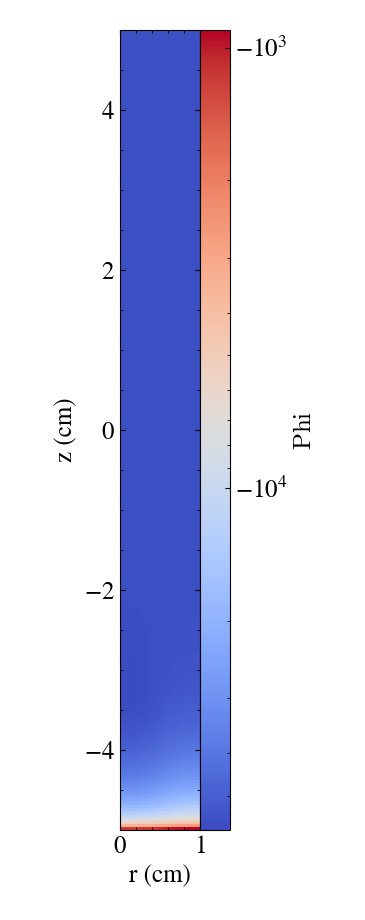
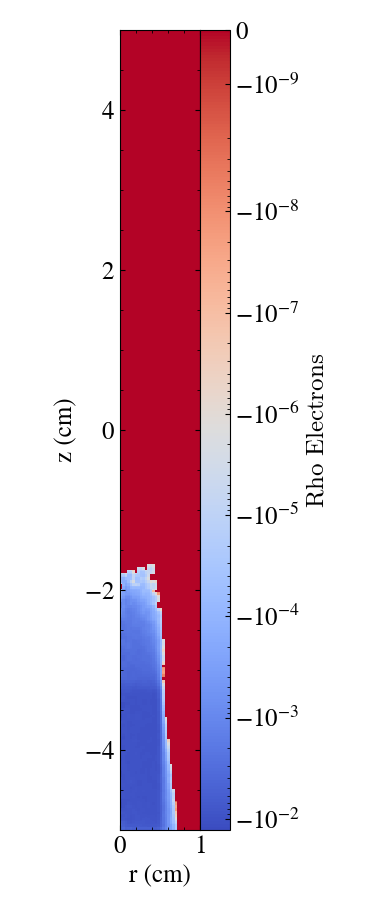
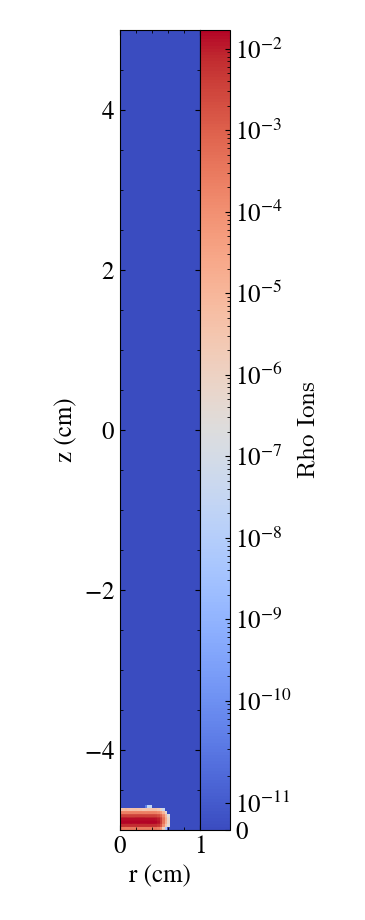

In [7]:
step = 50
fields = [('boxlib', 'rho_electrons'), ('boxlib', 'rho_ions'), ('boxlib', 'phi')]
ds = yt.load(f"{dirname}/diag{step:06d}/")
p = yt.SlicePlot(ds, "z", fields, origin="native")
p.set_cmap(fields, "coolwarm")
p.set_xlabel("r (cm)")
p.set_ylabel("z (cm)")
p.show();


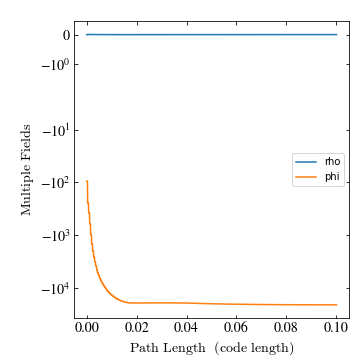

In [30]:
p = yt.LinePlot(ds, fields, (0.01,-0.05,0), (0.01,0.05,0), 1000)
p.annotate_legend(fields[0])
p.show()

In [10]:
plt.rcParams['animation.ffmpeg_path'] = '/scinet/niagara/software/2019b/opt/base/ffmpeg/3.4.2/bin/ffmpeg'
dirname = "diags128x256-crossing_time=1"
fields = [('boxlib', 'rho'), ('boxlib', 'phi')]
ts = yt.load(f"{dirname}/diag*")
plot = yt.SlicePlot(ts[0], "z", fields, origin="native")
plot.set_cmap(fields, "coolwarm")
plot.set_xlabel("r (cm)")
plot.set_ylabel("z (cm)")
fig = plot.plots[fields].figure

# animate must accept an integer frame number. We use the frame number
# to identify which dataset in the time series we want to load
def animate(i):
    ds = ts[i]
    plot._switch_ds(ds)

animation = FuncAnimation(fig, animate, frames=10)
animation.save("animation.mp4")

yt : [INFO     ] 2023-11-15 20:59:34,919 Parameters: current_time              = 6.586450265985087e-11
yt : [INFO     ] 2023-11-15 20:59:34,920 Parameters: domain_dimensions         = [128 256   1]
yt : [INFO     ] 2023-11-15 20:59:34,920 Parameters: domain_left_edge          = [ 0.   -0.05  0.  ]
yt : [INFO     ] 2023-11-15 20:59:34,921 Parameters: domain_right_edge         = [0.03 0.05 1.  ]


yt : [INFO     ] 2023-11-15 20:59:35,024 xlim = 0.000000 0.030000
yt : [INFO     ] 2023-11-15 20:59:35,025 ylim = -0.050000 0.050000
yt : [INFO     ] 2023-11-15 20:59:35,027 xlim = 0.000000 0.030000
yt : [INFO     ] 2023-11-15 20:59:35,028 ylim = -0.050000 0.050000
yt : [INFO     ] 2023-11-15 20:59:35,030 Making a fixed resolution buffer of (('boxlib', 'rho')) 800 by 800
yt : [INFO     ] 2023-11-15 20:59:35,233 Making a fixed resolution buffer of (('boxlib', 'phi')) 800 by 800
yt : [INFO     ] 2023-11-15 20:59:35,889 Parameters: current_time              = 6.586450265985087e-11
yt : [INFO     ] 2023-11-15 20:59:35,891 Parameters: domain_dimensions         = [128 256   1]
yt : [INFO     ] 2023-11-15 20:59:35,892 Parameters: domain_left_edge          = [ 0.   -0.05  0.  ]
yt : [INFO     ] 2023-11-15 20:59:35,892 Parameters: domain_right_edge         = [0.03 0.05 1.  ]
yt : [INFO     ] 2023-11-15 20:59:36,874 Parameters: current_time              = 6.586450265985087e-11
yt : [INFO     ] 2

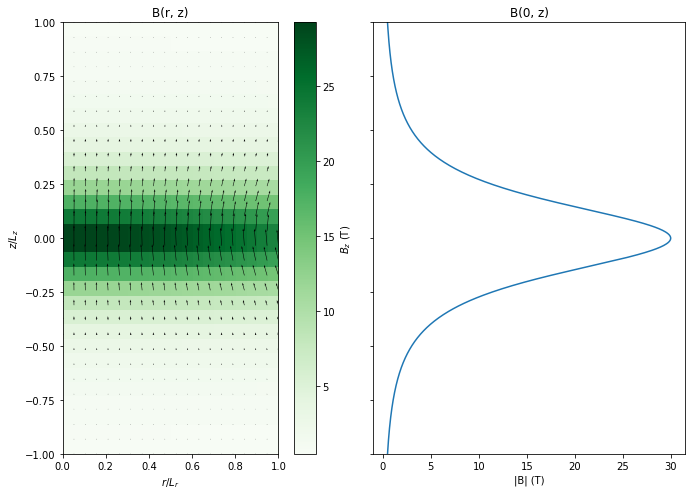

In [8]:
coil = magnetic_field.CoilBField(R=params.R_coil, B_max=params.B_max)
r_grid = np.linspace(0, 1, 20)
z_grid = np.linspace(-1, 1, 30)

rr, zz = np.meshgrid(r_grid, z_grid)
Br, Bz = coil.get_B_field(rr*params.Lr, zz*params.Lz)

# creating plot
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 7))

ax1.quiver(rr, zz, Br, Bz)
ax1.set_xlabel(f"$r/L_r$")
ax1.set_ylabel(f"$z/L_z$")
ax1.set_title("B(r, z)")

c = ax1.imshow(
    Bz, cmap='Greens',
    extent=[r_grid[0], r_grid[-1], z_grid[0], z_grid[-1]],
    aspect='equal', origin='lower'
)
bar = plt.colorbar(c, ax=ax1)
bar.set_label("$B_z$ (T)")

z_grid = np.linspace(z_grid[0], z_grid[-1], 800)
Br, Bz = coil.get_B_field(0, z_grid*params.Lz)
ax2.plot(Bz, z_grid)
ax2.set_xlabel("|B| (T)")
ax2.set_title("B(0, z)")

# show plot
plt.tight_layout()
# plt.savefig('B_field.png')
# plt.show()